
 close figure window to proceed and make .pdf


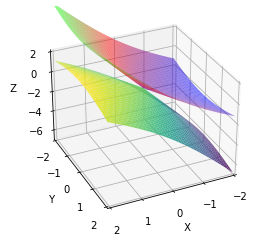

In [21]:
#%%
"""   
  
    Starting point for Chem 210B problems -- CWM June 2021
    
    Example of plotting surfaces using the mplot3d functions in python
      * bHere two surfaces are plotted on the same graph *
      
  
    Note the mplot3d plotting tools can behave strangely, but
    the matplotlib tools for ordinary 2d plots are generally robust
    and those are the ones we will ordinarily use in this course.
"""
#%%
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# some other, sometimes useful, functions from matplotlib
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
import numpy as np
#
#%%
#
# Define surface function(s) of x and y 
#
def Surface_1(x,y):
    surface_value = ( ((2*x) + np.sqrt( x**2 + y**2 )) )  
    return surface_value

def Surface_2(x,y):
    surface_value = ( ((2*x) - np.sqrt( x**2 + y**2 )) ) 
    return surface_value

#%%
# ********** Make plots using 3D plotting calls   ***************
#
#  Plot more than one surface on the same 3D Plot 
#
# Make data for plot_surface which requires that X, Y and Z be TWO dimensional arrays
# the two dimensions here are the theta and phi points
#
n_x = 40 # number of points to plot, with xmin = -xmax, even n_x includes x = 0
n_y = 40
xmax = 2 
xmin = -2
ymax = 2
ymin = -2
dx = (xmax-xmin)/n_x
dy = (ymax-xmin)/n_y
X= np.eye(n_x+1,n_y + 1)
Y= np.eye(n_x + 1,n_y + 1)
Z1= np.eye(n_x + 1,n_y + 1)
Z2= np.eye(n_x + 1,n_y + 1)
for i_x in range(n_x + 1):
    xval = xmin + i_x*dx
    for i_y in range(n_y + 1):
        yval = ymin + i_y*dy
        zval = Surface_1(xval,yval) 
        X[i_x,i_y] = xval
        Y[i_x,i_y] = yval
        Z1[i_x,i_y] = Surface_1(xval,yval) # make data for first surface
        Z2[i_x,i_y] = Surface_2(xval,yval) # make data for second surface
#
#   surface plot
#
fig=plt.figure()
ax = plt.axes(projection='3d')
# note set_ needed for these options
ax.set_xlim(xmin,xmax )
ax.set_ylim(ymin,ymax )
# picking the maximum and minimum of the z axis depends on the case at hand
maxval = np.amax(Z2) 
minval = np.amin(Z2) 
ax.set_zlim(minval,maxval )
ax.set_xlabel(" X ")
ax.set_ylabel(" Y ")
ax.set_zlabel(" Z ")
# initial viewpoint
ax.view_init(elev=30., azim=65.)
# Plot each surface using these axes
# Note: alpha controls transparency
# color maps are  from standard list, many are possible including 
#     binary, binary_r, bone,, brg, brg_r, bwr, cividis, cool, coolwarm, copper, terrain
ax.plot_surface(X,Y,Z1,rstride=1, cstride=1,  #  Plot first surface
        antialiased=True, alpha=0.5, cmap='brg') 
ax.plot_surface(X,Y,Z2,rstride=1, cstride=1,   #  Plot second surface
        antialiased=True, alpha=0.85, cmap='viridis')
# contours can be plotted on a plane parallel to the xy plane too. Note offset
#cset = ax.contourf(X,Y,Z1,zdir='z',offset=minval,cmap='brg')
print("\n close figure window to proceed and make .pdf")
# evidently plt.savefig has to come first.  view_init controls viewpoint
# example of constructing a file name
plt.savefig('Surface_plots_example_'+str(n_x)+'.pdf', transparent=False)
# mouse controls viewpoint in the screen  version
plt.show()
#  uncomment exit() when running directly from terminal window
#exit()
